# The Effect of TSM-Attacks on the Histogram
According to 'StirMark Benchmark for Audio'[1] the resampling and timestretching (pitch-invariant scaling), which modify the time scale of the signal, are two common attacks on audio watermarks, which try to desynchronize the embedder and detector. 'Resampling' changes the playback speed of the audio signal and therefore modifies the pitch. So both the tempo and the perceived height of the tone are altered. So the 'resampling'-attack has - depenging on the resampling factor - a rather big impact on the perception of the sound. Timestretching modifies the playback speed also, but preserves the pitch of the audio signal. Because of the fact that the human auditory system is rather insensitive to time scale modification, these are rather serious attacks to audio watermarks. [2] 

In [1]:
# Perform a few necessary set up operations
%cd ../
%matplotlib inline

/Users/gru/Documents/skripte/CSM/scripts/ws_15_16/38777 Masterthesis/src/audio_cwe_framework


In [2]:
# Imports some dependencies
import soundfile as sf
import numpy as np
import math
import matplotlib.pyplot as plt

from core.audio_cwe.xs_wm_scheme import XsWMSystem
from core.audio_cwe.watermarking_scheme import HistBasedWMSystem
from core.audio_cwe import watermarking_utils


In [3]:
# %load -s resample tsm_utils.py
def resample(samples, factor):
    """
    Multiplies the playback speed of a sound speed by a `factor`. This is accomplished by removing samples
    at certain indices or duplicating them. Therefore the pitch is altered also.
    """
    ids = np.round(np.arange(0, len(samples), factor))
    ids = ids[ids < len(samples)].astype(int)

    return samples[ids]

In [4]:
# Load the original sound file
samples, samplerate = sf.read('../res/demo/notebooks/tsm/70.wav', dtype=np.int16)
samples = samples[:,0]  # interpret the signal as mono 


# Load resampled file
resampled_samples, samplerate = sf.read('../res/demo/notebooks/tsm/70_resampling_+30.wav', dtype=np.int16)
resampled_samples = resampled_samples[:,0]  # interpret the signal as mono 
resampled_samples = resample(samples, 1.3)
# Load timestretched file
timestretched_samples, samplerate = sf.read('../res/demo/notebooks/tsm/70_timestreching_+30.wav', dtype=np.int16)
timestretched_samples = timestretched_samples[:,0]  # interpret the signal as mono 


# Parameters to extract histogram
la = 2.5
num_bins = 500
orig_mean = HistBasedWMSystem.mean_of_absolute_values(samples)

Length of Histograms:  500


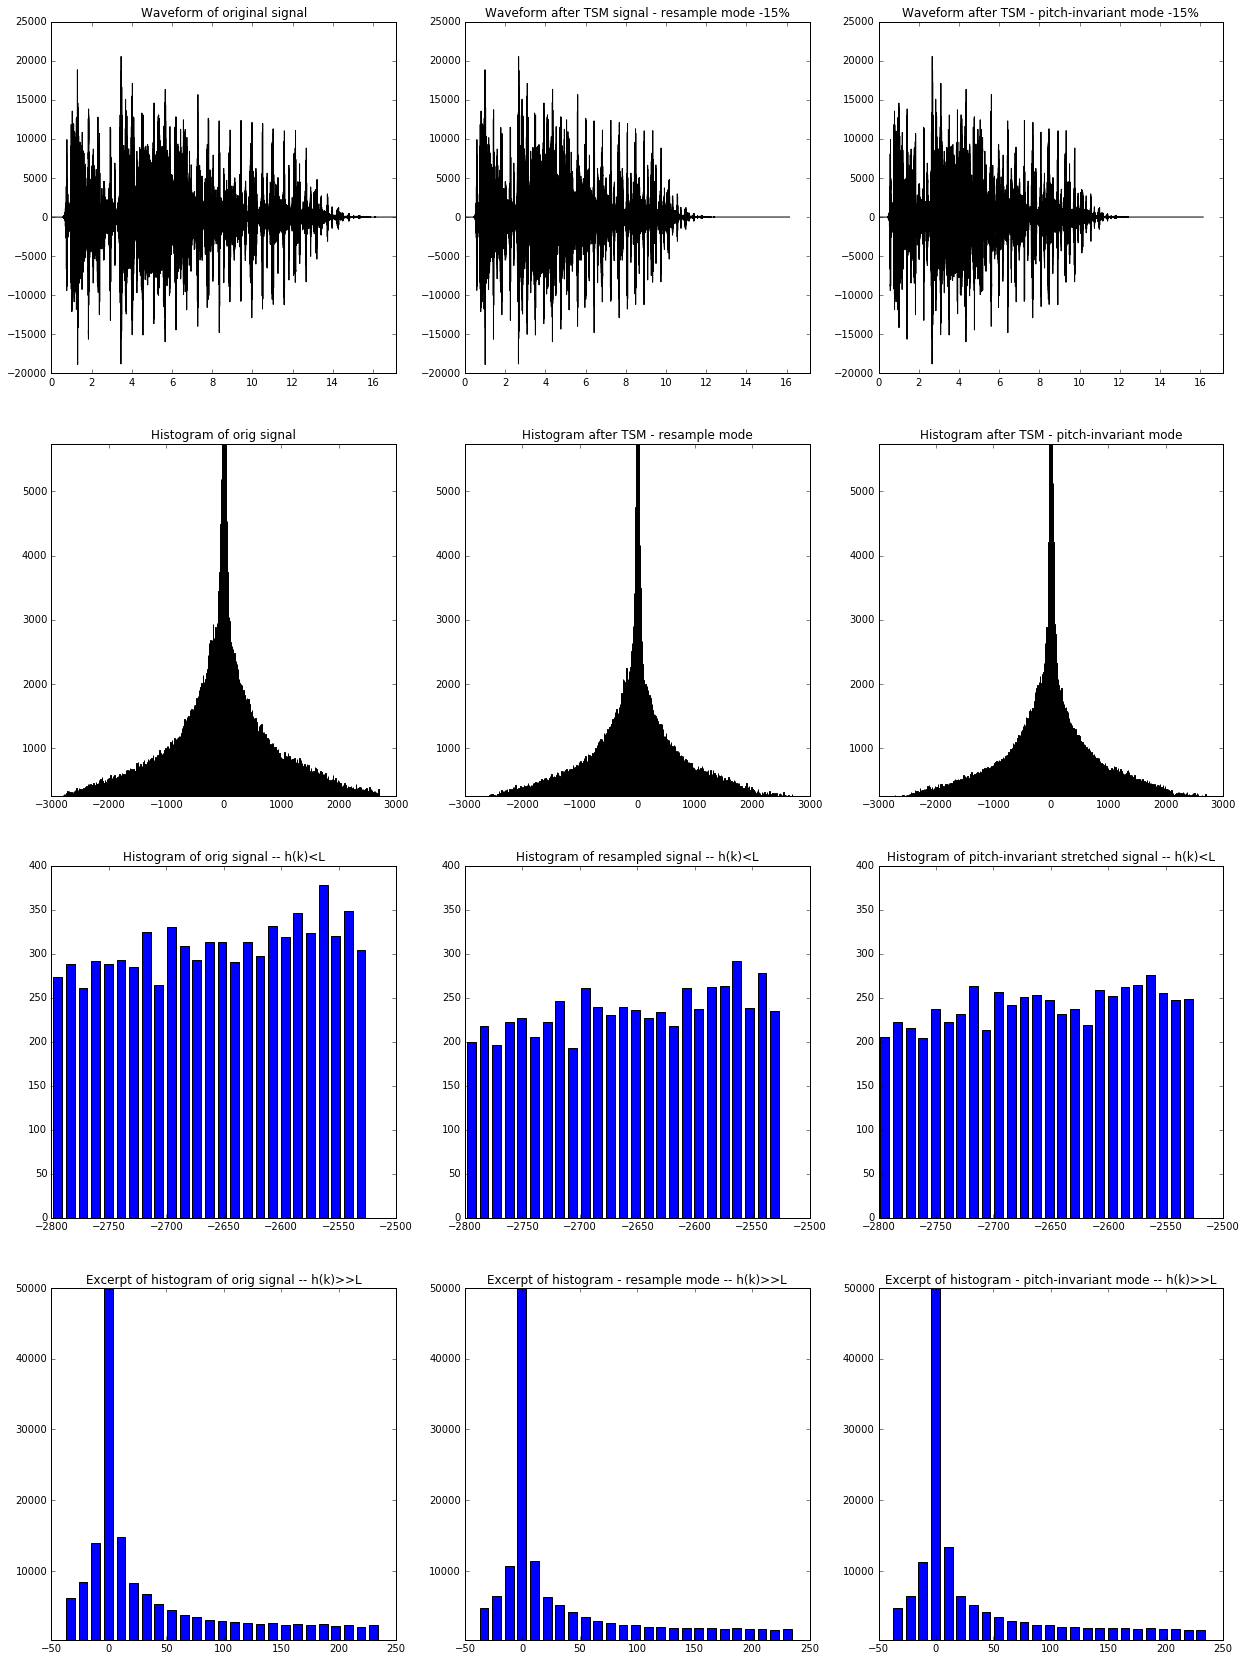

In [5]:
# Plot the waveforms
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(21, 29))
ax = axes.flat
i = 0

timeArray0 = np.arange(0, len(samples), 1)#contains sample number (0,1,2,3,...)
timeArray0 = timeArray0 / samplerate #contains time label in seconds
#timeArray0 = timeArray0 * 1000  #scale to milliseconds

timeArray1 = np.arange(0, len(resampled_samples), 1)#contains sample number (0,1,2,3,...)
timeArray1 = timeArray1 / samplerate #contains time label in seconds
#timeArray1 = timeArray1 * 1000  #scale to milliseconds

timeArray2 = np.arange(0, len(timestretched_samples), 1)#contains sample number (0,1,2,3,...)
timeArray2 = timeArray2 / samplerate #contains time label in seconds
#timeArray2 = timeArray2 * 1000  #scale to milliseconds

#ax0.set_ylim([np.amin(samples), np.amax(samples)+1])
ax[i].set_xlim([np.amin(timeArray2), np.amax(timeArray2)+1])
ax[i].plot(timeArray0, samples, color='k')
ax[i].set_title("Waveform of original signal")
i+=1

#ax1.set_ylim([np.amin(samples), np.amax(samples)+1])
ax[i].set_xlim([np.amin(timeArray2), np.amax(timeArray2)+1])
ax[i].plot(timeArray1, resampled_samples ,color='k') 
ax[i].set_title("Waveform after TSM signal - resample mode -15%")
i+=1


ax[i].set_xlim([np.amin(timeArray2), np.amax(timeArray2)+1])
ax[i].plot(timeArray2, timestretched_samples ,color='k') 
ax[i].set_title("Waveform after TSM - pitch-invariant mode -15%")
i+=1


# Plot the histograms of the encrypted signal and the encrypted and marked signal
hist0, bins0 = HistBasedWMSystem.generate_histogram(samples, la, num_bins, orig_mean)
width0 = 0.7 * (bins0[1] - bins0[0])
center0 = (bins0[:-1] + bins0[1:]) / 2


hist1, bins1 = HistBasedWMSystem.generate_histogram(resampled_samples, la, num_bins, orig_mean)
width1 = 0.7 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

hist2, bins2 = HistBasedWMSystem.generate_histogram(timestretched_samples, la, num_bins, orig_mean)
width2 = 0.7 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2

print("Length of Histograms: ", len(hist0))

ax[i].bar(center0, hist0, align='center', width=width0)
ax[i].set_title("Histogram of orig signal")
ax[i].set_ylim([np.amin(hist0), np.mean(hist0)+np.amax(hist0)//64])
i+=1

ax[i].bar(center1, hist1, align='center', width=width1)
ax[i].set_title("Histogram after TSM - resample mode")
ax[i].set_ylim([np.amin(hist0), np.mean(hist0)+np.amax(hist0)//64])
i+=1

ax[i].bar(center2, hist2, align='center', width=width2)
ax[i].set_title("Histogram after TSM - pitch-invariant mode")
ax[i].set_ylim([np.amin(hist0), np.mean(hist0)+np.amax(hist0)//64])
i+=1

# Plot a fraction of the histogram

start_bin = 0 #len(bins0)/2
end_bin = 25 #start_bin + 25
hist4 = hist0[start_bin:end_bin]
bins4 = bins0[start_bin:end_bin+1]
center4 = (bins4[:-1] + bins4[1:]) / 2
width4 = 0.7 * (bins4[1] - bins4[0])

hist5 = hist1[start_bin:end_bin]
bins5 = bins1[start_bin:end_bin+1]
center5 = (bins5[:-1] + bins5[1:]) / 2
width5 = 0.7 * (bins5[1] - bins5[0])

hist6 = hist2[start_bin:end_bin]
bins6 = bins2[start_bin:end_bin+1]
center6 = (bins6[:-1] + bins6[1:]) / 2
width6 = 0.7 * (bins6[1] - bins6[0])

ax[i].bar(center4, hist4, align='center', width=width4)
ax[i].set_title("Histogram of orig signal -- h(k)<L")
ax[i].set_ylim(0, 400)
i+=1

ax[i].bar(center5, hist5, align='center', width=width5)
ax[i].set_title("Histogram of resampled signal -- h(k)<L")
ax[i].set_ylim(0, 400)
i+=1

ax[i].bar(center6, hist6, align='center', width=width6)
ax[i].set_title("Histogram of pitch-invariant stretched signal -- h(k)<L")
ax[i].set_ylim(0, 400)
i+=1


start_bin = math.floor(len(bins0)/2) +1
end_bin = start_bin + 25

hist7 = hist0[start_bin:end_bin]
bins7 = bins0[start_bin:end_bin+1]
center7 = (bins7[:-1] + bins7[1:]) / 2
width7 = 0.7 * (bins7[1] - bins7[0])

hist8 = hist1[start_bin:end_bin]
bins8 = bins1[start_bin:end_bin+1]
center8 = (bins8[:-1] + bins8[1:]) / 2
width8 = 0.7 * (bins8[1] - bins8[0])

hist9 = hist2[start_bin:end_bin]
bins9 = bins2[start_bin:end_bin+1]
center9 = (bins9[:-1] + bins9[1:]) / 2
width9 = 0.7 * (bins9[1] - bins9[0])

ax[i].bar(center7, hist7, align='center', width=width7)
ax[i].set_title("Excerpt of histogram of orig signal -- h(k)>>L")
ax[i].set_ylim([np.amin(hist0), 50000])
i+=1

ax[i].bar(center8, hist8, align='center', width=width8)
ax[i].set_title("Excerpt of histogram - resample mode -- h(k)>>L")
ax[i].set_ylim([np.amin(hist0), 50000])
i+=1

ax[i].bar(center9, hist9, align='center', width=width9)
ax[i].set_title("Excerpt of histogram - pitch-invariant mode -- h(k)>>L")
ax[i].set_ylim([np.amin(hist0), 50000])



plt.show()

This illustrates Xiangs et al.[2] observations on p.5, where they concludes, that resampling is a temporal linear scaling and thus has no effect on the relative proportions ot the bins. Pitch-invariant time stretching however is an *approximately* temporal linear scaling procedure and therefore the relative relations in the bins are only approximately invariant. Important is, that both statements only hold under the condition, that $h(k)>>L$, where $h(k$ is the $k$-th bin and $L$ the number of bins. The histograms in the second last row are an excerpt from the left most edge, where the bins hold a lot less samples, so the condition is not fulfilled and the relative relations are altered to a certain degree. The last row of figures are extracted from the middle of the histograms and show the result, when $h(k)>>L$ is fulfilled.

(See Xiang[5] p.7-8 for the full results of their experimental testing.)


## Illustrate the Effects on the Mean

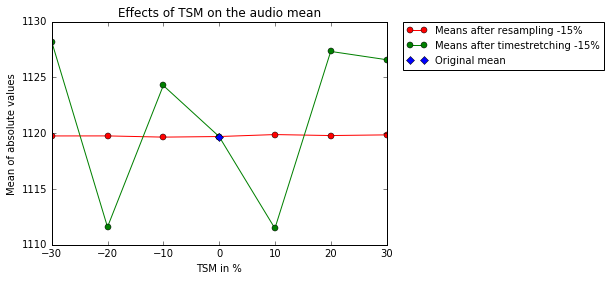

In [12]:
# calculate the means for different scaling factors
means_resample = []
means_timestretch = []
suffixes = ["-30", "-20", "-10","+00", "+10", "+20", "+30"]
factors = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
low = 90
high = 110

for i in range(0, 7):
    rs = resample(samples, factors[i])
    means_resample.append(HistBasedWMSystem.mean_of_absolute_values(rs))
    
    ts_samples, samplerate = sf.read('../res/demo/notebooks/tsm/70_tsm_timestretching_'+suffixes[i]+".wav", dtype=np.int16)
 
    means_timestretch.append(HistBasedWMSystem.mean_of_absolute_values(ts_samples[:,0]))

x = suffixes #np.arange(0, 6, 1)
y1 = means_resample
y2 = means_timestretch



plt.figure(figsize=(12, 6)))
plt.title("Effects of TSM on the audio mean")
plt.ylabel("Mean of absolute values")
plt.xlabel('TSM in %')
plt.plot(x, y1, 'or-', label="Means after resampling -15%")
plt.plot(x, y2, 'og-', label="Means after timestretching -15%")
plt.plot([0], [orig_mean], 'bD', label="Original mean")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.01, prop={'size':10})
#plt.legend(bbox_to_anchor=(0, 0, 1, 1), loc=1, borderaxespad=0.8)

plt.show()   


This supports Xiangs results of their experimental testing, which states, that the means of absolute values are robust to resampling, but underlie a certain error ratio when timestretching is applied. 

# Conclusion
These observations and the conclusions from Xiang's work have certain impacts on the design of the combined method of Xiang's et al. and Schmitz's et al. ideas. Beforehand it should be validated, that for most of the bins $h(k)>>L$ is true and this should be considered when forming the histogram also (use $\lambda \cdot \bar{A}$). 
These changes are necessary, because timestretching is only an *approximately* temporal linear scaling processing.


* The bin selection process leads to a different result on the detector side after performing the time stretching. Therefore the detector should not get the seed as secret key, but a concatenation of the indices of the pseudo randomly selected bin pairs.
* In the bin selection process, which is driven by a PRNG, it is no longer sufficient to check $h(x)!= h(y)$, because after timestretching this disparity might not exist anymore (some samples are added or lost). So it is necessary to make sure, that $\lvert h(x)- h(y) \rvert > T$, where T is some defined threshold.
* The capacity depends on the length of the signal to be marked. This is the consequence of the condition $h(k)>>L$

The insertion of a watermark in shorter signals, where $h(k)\approx L$ or even $ h(k)< L $, seems to be problematic, but with the specification of the threshold $T$ doable. $\phantom{aaaaaaaaaaaaaaaaaaaaaaaaaaa}$



-----


## References:
[1] Dr. Lang, Andreas: StirMark Benchmark for Audio: List and Description of Attacks; 2007; http://omen.cs.uni-magdeburg.de/alang/smba.php#smba_LA

[2] Xiang et al. 2007. Time-Scale Invariant Audio Watermarking Based on Statistical Features in Time Domain, P.2